# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# 读取数据
导入数据分析所需要的库，并通过Pandas的read_csv函数，将原始数据文件house_price.csv里的数据内容，解析为DataFrame并赋值给变量o_df1。

In [3]:
o_df1 = pd.read_csv("house_price.csv")
o_df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


评估和清理数据
在这一部分中，我们将对在上一部分建立o_df1 e所包含的数据进行评估和清理
主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。



In [4]:
c_df1 = o_df1.copy()
c_df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


为了区分开经过清理的数据和原始的数据，我们创建新的变量c_df1，让它为o_df1复制出的副本。我们之后的清理步骤都将被运用在c_df1上。


# 数据整齐度

In [9]:
c_df1.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

#### 数据的干净度

In [11]:
c_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


从输出结果来看，c_df1数据共有545条观察值，不存在缺失值。

#### 处理不一致数据
不一致数据可能存在于Species变量中，我们要查看是否存在多个不同值指代同一鸢尾花种类的情况。


In [5]:
print(c_df1["mainroad"].value_counts())
print(c_df1["guestroom"].value_counts())
print(c_df1["basement"].value_counts())
print(c_df1["hotwaterheating"].value_counts())
print(c_df1["airconditioning"].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64


从以上输出结果来看，mainroad,guestroom,basement,hotwaterheating,airconditioning,均只有两种可能的值，不存在不一致数据。

### 处理无效或错误数据

In [19]:
c_df1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


从以上统计信息来看，c_df1里不存在脱离现实意义的数值。

# 整理数据

数据类型方面，我们已知mainroad（是否位于主路）、guestroom（是否有客房）、basement（是否有地下室）、hotwaterheating（是否有热水器）、airconditioning（是否有空调）、prefarea（是否位于城市首选社区）、furnishingstatus（装修状态）都是分类数据，可以把数据类型都转换为Category。

In [6]:
c_df1["mainroad"] = c_df1["mainroad"].astype("category")
c_df1["guestroom"] = c_df1["guestroom"].astype("category")
c_df1["basement"] = c_df1["basement"].astype("category")
c_df1["hotwaterheating"] = c_df1["hotwaterheating"].astype("category")
c_df1["airconditioning"] = c_df1["airconditioning"].astype("category")
c_df1["prefarea"] = c_df1["prefarea"].astype("category")
c_df1["furnishingstatus"] = c_df1["furnishingstatus"].astype("category")

# 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与房价存在相关性的变量，为后续的进一步分析提供方向。

In [10]:
import matplotlib.pyplot as plt

In [28]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
# 图形的宽度被设置为7.00英寸，高度被设置为3.50英寸。
plt.rcParams["figure.autolayout"] = True
# 会自动调整图形中的子图、标题、标签等的位置，以确保它们不会重叠，并且整个图形看起来更加整洁和易读。

## 房价分布

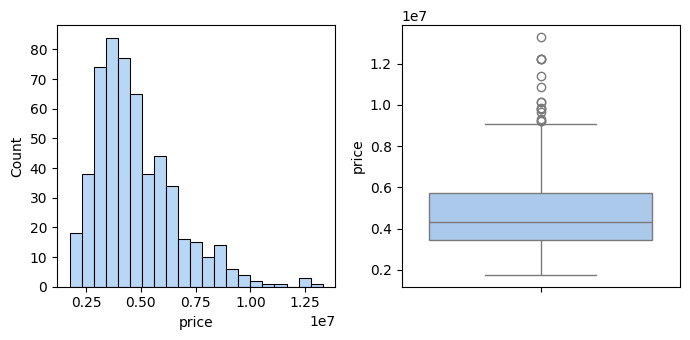

In [48]:
figure, axes = plt.subplots(1,2)
sns.histplot(c_df1,x="price",ax=axes[0])
sns.boxplot(c_df1,y="price",ax=axes[1])
plt.show()

房价呈右偏态分布，说明数据集中的大多数房子价格中等，但有一些价格很高的极端值，使得均值被拉高。

In [12]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

## 面积分布

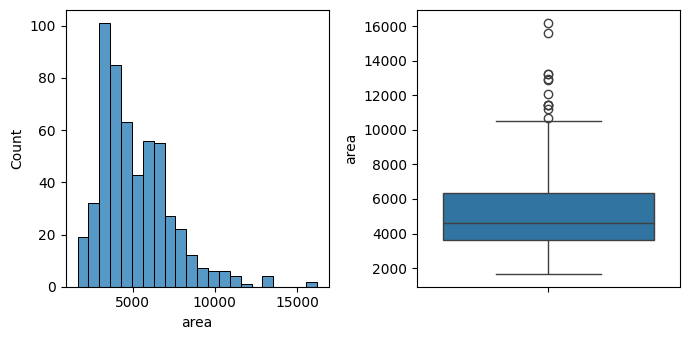

In [36]:
figure, axes = plt.subplots(1,2)
sns.histplot(c_df1,x="area",ax=axes[0])
sns.boxplot(c_df1,y="area",ax=axes[1])
plt.show()

面积与房价相似，同呈右态分布

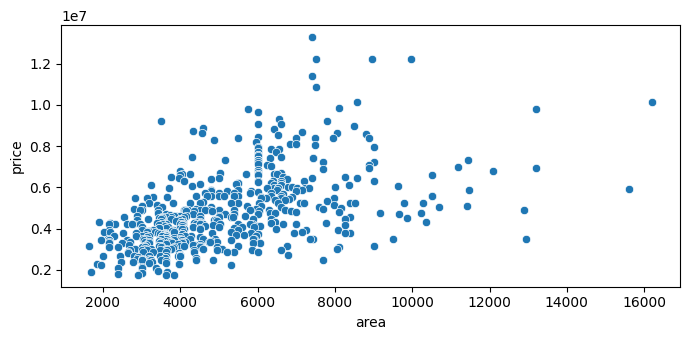

In [40]:
sns.scatterplot(c_df1,x="area",y="price")
plt.show()

整体偏向正相关，但关系的强度需要后续通过计算相关性来得到。

# 卧室数分析

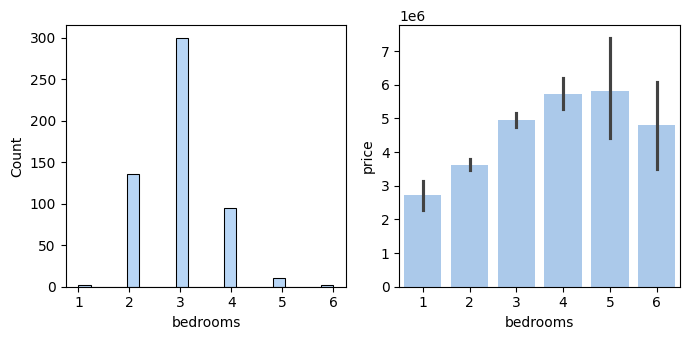

In [52]:
figure, axes = plt.subplots(1,2)
sns.histplot(c_df1,x="bedrooms",ax=axes[0])
sns.barplot(c_df1,x="bedrooms",y="price",ax=axes[1])
plt.show()

数据集中可以看出，大部分卧室数量在2-4之间，房价在卧室数量为5之前，呈直线上升，在5间卧室数量怎呈现不一样的表现

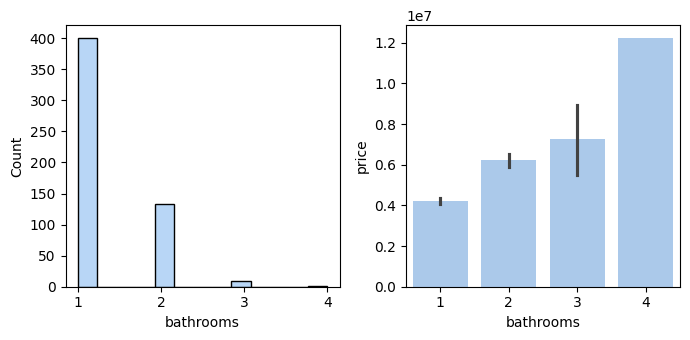

In [53]:
figure, axes = plt.subplots(1,2)
sns.histplot(c_df1,x="bathrooms",ax=axes[0])
sns.barplot(c_df1,x="bathrooms",y="price",ax=axes[1])
plt.show()

数据集中可以看出，大部分厕所数量在1间，有少部分有2间，3、4则更少，房价在随着厕所数量的上升而上升

# 楼层与房价的关系

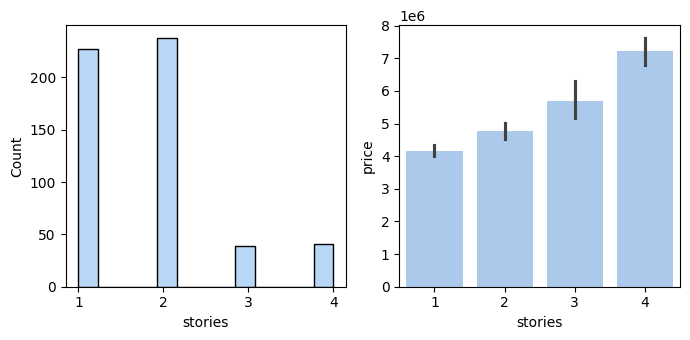

In [55]:
figure, axes = plt.subplots(1,2)
sns.histplot(c_df1,x="stories",ax=axes[0])
sns.barplot(c_df1,x="stories",y="price",ax=axes[1])
plt.show()

数据集中可以看出一共有4层楼层数，图中可以看出房价随着楼层上升而上升。

# 车库与房价的关系

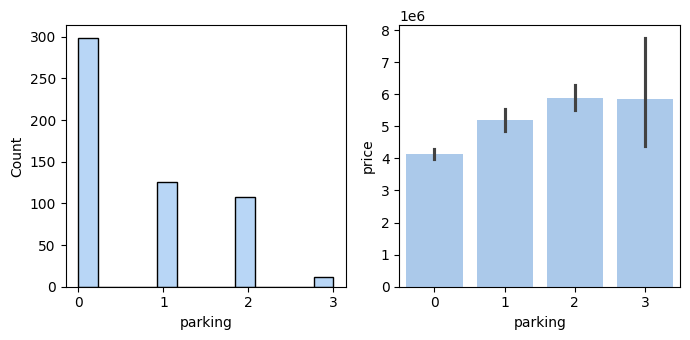

In [58]:
figure, axes = plt.subplots(1,2)
sns.histplot(c_df1,x="parking",ax=axes[0])
sns.barplot(c_df1,x="parking",y="price",ax=axes[1])
plt.show()

数据集一共包含0-4种车库数类型，图中从车库数可以看出，在0-2车库数间，房价呈上升趋势，在2-3则呈平势。

# 是否位于主路和房价的关系

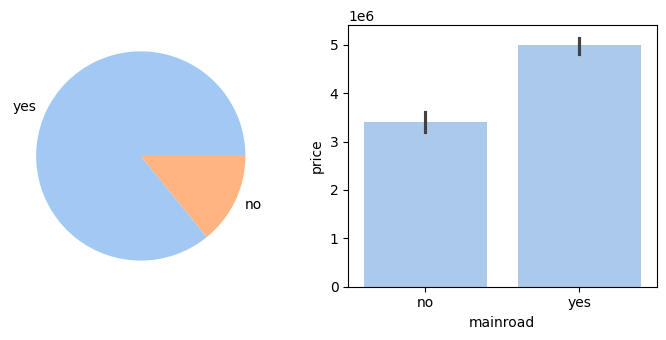

In [68]:
figure, axes = plt.subplots(1,2)
c_df1_mac = c_df1["mainroad"].value_counts()
c_df1_mac_index = c_df1_mac.index
axes[0].pie(c_df1_mac,labels=c_df1_mac.index)
sns.barplot(c_df1,x="mainroad",y="price",ax=axes[1])
plt.show()


此数据集中房子大多数位于主路。

从平均房价与楼层数之间的柱状图来看，在主路的的房子价格也相应高。

# 是配备客房和房价的关系

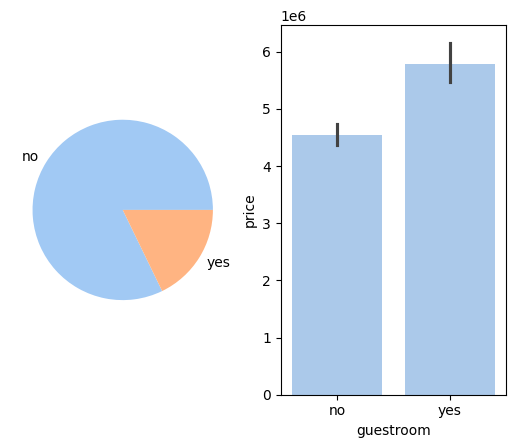

In [13]:
figure, axes = plt.subplots(1,2)
c_df1_guestroom = c_df1["guestroom"].value_counts()
c_df1_guestroom_index = c_df1_guestroom.index
axes[0].pie(c_df1_guestroom,labels=c_df1_guestroom_index)
sns.barplot(c_df1,x="guestroom",y="price",ax=axes[1])
plt.show()


此数据集中房子大多数都不配备客房。

从平均房价与是否客房之间的柱状图来看，拥有客房的房子价格也相应高。

# 是否配备地下室和房价的关系

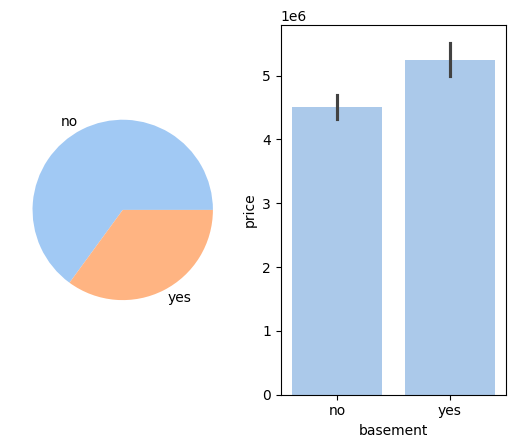

In [14]:
figure, axes = plt.subplots(1,2)
c_df1_basement = c_df1["basement"].value_counts()
c_df1_basement_index = c_df1_basement.index
axes[0].pie(c_df1_basement,labels=c_df1_basement.index)
sns.barplot(c_df1,x="basement",y="price",ax=axes[1])
plt.show()


此数据集中房子大多数是不配套地下室。

从平均房价与配备地下室客房之条形柱状图来配套看，地下室客房的房子价格也相应高。

# 是否配备热水器和房价的关系

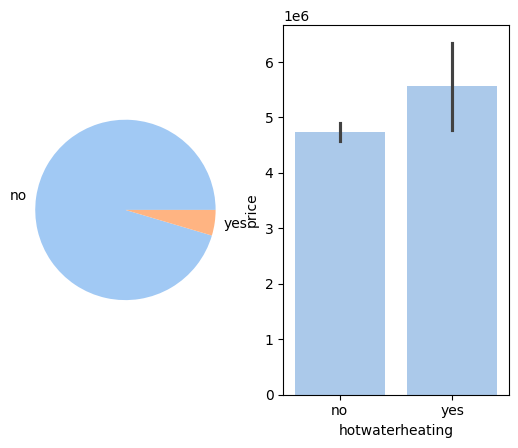

In [16]:
figure, axes = plt.subplots(1,2)
c_df1_hotwaterheating = c_df1["hotwaterheating"].value_counts()
c_df1_hotwaterheating_index = c_df1_hotwaterheating.index
axes[0].pie(c_df1_hotwaterheating,labels=c_df1_hotwaterheating.index)
sns.barplot(c_df1,x="hotwaterheating",y="price",ax=axes[1])
plt.show()

此数据集中房子绝大部分没有热水器。

从平均房价与热水器之间的柱状图来看，有热水器的的房子价格也相应高。

# 是否配备空调和房价的关系

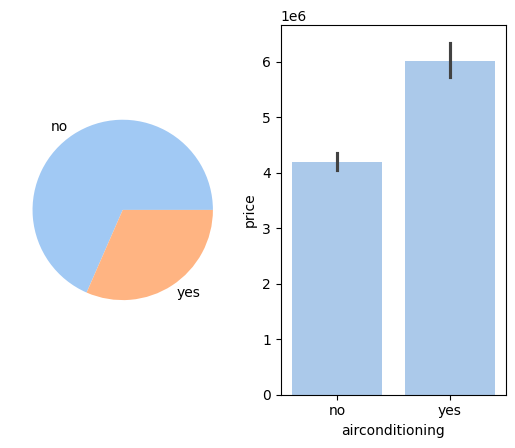

In [18]:
figure, axes = plt.subplots(1,2)
c_df1_airconditioning = c_df1["airconditioning"].value_counts()
c_df1_airconditioning_index = c_df1_airconditioning.index
axes[0].pie(c_df1_airconditioning,labels=c_df1_airconditioning.index)
sns.barplot(c_df1,x="airconditioning",y="price",ax=axes[1])
plt.show()

此数据集中房子绝大部分没有配套空调。

从平均房价与空调之间的柱状图来看，有空调的的房子价格也相应高。

# 是否位于城市首选社区和房价的关系

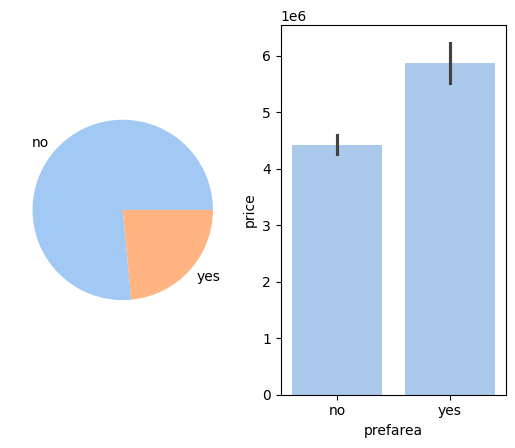

In [20]:
figure, axes = plt.subplots(1,2)
c_df1_prefarea = c_df1["prefarea"].value_counts()
c_df1_prefarea_index = c_df1_prefarea.index
axes[0].pie(c_df1_prefarea,labels=c_df1_prefarea.index)
sns.barplot(c_df1,x="prefarea",y="price",ax=axes[1])
plt.show()

此数据集中房子绝大部分不在城市首选社区。

从平均房价与城市首选社区之间的柱状图来看，在城市首选社区的的房子价格也相应高。

# 装修状态和房价的关系

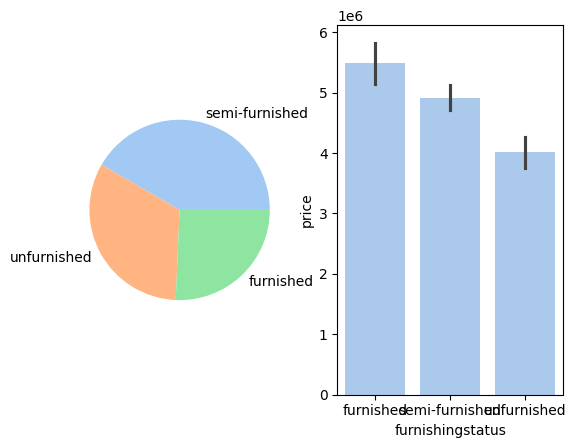

In [23]:
figure, axes = plt.subplots(1,2)
c_df1_furnishingstatus = c_df1["furnishingstatus"].value_counts()
c_df1_furnishingstatus_index = c_df1_furnishingstatus.index
axes[0].pie(c_df1_furnishingstatus,labels=c_df1_furnishingstatus.index)
sns.barplot(c_df1,x="furnishingstatus",y="price",ax=axes[1])
plt.show()

此数据集中房子绝大部分都是毛胚和简装。

从平均房价与装修状态之间的柱状图来看，在装修状态的的房子价格随着房子装修的简化，价格也随之走低。

# 分析数据
在分析步骤中，我们将利c_df1e的数据，进行线性回归分析，目标是得到一个可以根据房屋各个属性对价格进行预测的数学模型。

我们先引入做线性回归所需的模块。

In [25]:
import statsmodels.api as sm

然后可以创建一个新的DataFramelr_house_price，让它作为我们进行线性回归分析所用的数据。
c_df1e区分开的原因是，我们在进行回归分析前，还可能需要对数据进行一些准备，比如引入虚拟变量，这些都可以在lr_house_price上执行


In [26]:
lr_house_price = c_df1.copy()

由于数据里存在分类变量，无法直接建立线性回归模型。我们需要引入虚拟变量，也就是用0和1分别表示是否属于该分类。

In [30]:
lr_house_price = pd.get_dummies(lr_house_price,drop_first=True,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],dtype=int)

In [33]:
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


接下来，我们要把因变量和自变量划分出来。

因变量是price变量，因为我们进行线性回归的目的，是得到一个能根据其它可能对房屋价格有影响的变量，来预测销售价格的模型。

In [34]:
y = lr_house_price["price"]

我们可以把除价格之外的都纳入自变量，但需要查看它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性。

In [35]:
x = lr_house_price.drop("price",axis=1)

一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可。

In [37]:
x.corr().abs()>0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


接下来，给模型的线性方程添加截距。

In [38]:
x =sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


下一步就可以调用OLS函数，利用最小二乘法来得到线性回归模型的参数值。

In [40]:
model = sm.OLS(y,x).fit()

为了查看模型结果，我们使用summary方法来获得总结信息。

In [43]:
result = model.summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          9.07e-123
Time:                        14:24:47   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为以下因素对房屋价格没有显著性影响：卧室数、是否为简装房。此外，常数（表示线性方程的截距）的P值也很大，说明也没有显著影响。

可以把这些变量移除后，再次建立线性回归模型。

In [45]:
x=x.drop(["const","bedrooms","furnishingstatus_semi-furnished"],axis=1)

In [46]:
model = sm.OLS(y,x).fit()
result = model.summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):                        0.00
Time:                        14:28:27   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到，当我们把P值较大的自变量从线性回归模型中移除后，R方的值从0.682增长到了0.957，提高了模型对现有数据的拟合度。

根据各个自变量在线性回归方程中的系数来看，模型预测以下因素的增加会显著增加房屋价格：房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区。

线性回归模型预测以下因素的增加会显著降低房屋价格：房屋未经装修，为毛坯房。

In [71]:
#面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。
df2 = pd.DataFrame({"area":[5600],"bedrooms":[4],"bathrooms":[2],"stories":[2],"mainroad":["no"],"guestroom":["yes"],"basement":["yes"],"hotwaterheating":["yes"],"airconditioning":["yes"],
                    "parking":[2],"prefarea":["yes"],"furnishingstatus":["unfurnished"]})
df2

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,yes,yes,yes,yes,2,yes,unfurnished


我们需要把分类变量的类型转换为Category，并且通过`categories`参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [72]:
df2["mainroad"] = pd.Categorical(df2["mainroad"],categories=("no","yes"))
df2["guestroom"] = pd.Categorical(df2["guestroom"],categories=("no","yes"))
df2["basement"] = pd.Categorical(df2["basement"],categories=("no","yes"))
df2["hotwaterheating"] = pd.Categorical(df2["hotwaterheating"],categories=("no","yes"))
df2["airconditioning"] = pd.Categorical(df2["airconditioning"],categories=("no","yes"))
df2["prefarea"] = pd.Categorical(df2["prefarea"],categories=("no","yes"))
df2["furnishingstatus"] = pd.Categorical(df2["furnishingstatus"],categories=("furnished","semi-furnished","unfurnished"))

In [73]:
df2 = pd.get_dummies(df2,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],dtype=int,drop_first=True)
df2

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,1,1,1,1,1,0,1


引入虚拟变量后，开始划分自变量和因变量

In [74]:
df2 = df2.drop(["bedrooms","furnishingstatus_semi-furnished"],axis =1)
df2

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,5600,2,2,2,0,1,1,1,1,1,1


In [76]:
df2_price = model.predict(df2)
df2_price

0    7.862049e+06
dtype: float64

线性回归模型预测的价格为：7071927。